In [1]:
# 1.0 Call libraries
# 1.1 Data manipulation libraries
import numpy as np
import pandas as pd

# 1.2 sklearn libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# 1.3 For plotting NN model
#  conda install -c anaconda graphviz
#  conda install -c anaconda pydot
#from skimage import io
#import pydot

# 1.4 Keras model components
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, concatenate, GRU, Embedding, Flatten
from tensorflow.keras.layers import Conv1D, Reshape
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

# 1.4.1 For text (word) to integer transformation
from tensorflow.keras.preprocessing.text import Tokenizer

# 1.4.2 For making all integer sequences of equal length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1.4.3 Import backend to invoke tensorflow commands to manipulate tensors
from tensorflow.keras import backend as K

# 1.5 Plotting libraries
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
%matplotlib inline 

# 1.6 Misc
import math, time, os,gc

In [2]:
path = "C:\\Users\\aashi\\Downloads\\"

In [3]:
app = pd.read_csv("C:\\Users\\aashi\\Downloads\\application_record.csv")
crecord = pd.read_csv("C:\\Users\\aashi\\Downloads\\credit_record.csv")

In [4]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
crecord.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
app.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [7]:
crecord.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [8]:
app['OCCUPATION_TYPE'] = app['OCCUPATION_TYPE'].fillna(app['OCCUPATION_TYPE'].mode()[0])

In [9]:
app.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [10]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [11]:
app['ID'].shape

(438557,)

In [12]:
app['ID'].nunique()

438510

In [13]:
crecord['ID'].shape

(1048575,)

In [14]:
crecord['ID'].nunique() 

45985

In [15]:
app = app.drop_duplicates('ID', keep='last') 

In [16]:
ot = pd.DataFrame(app.dtypes =='object').reset_index()
object_type = ot[ot[0] == True]['index']
object_type

1             CODE_GENDER
2            FLAG_OWN_CAR
3         FLAG_OWN_REALTY
6        NAME_INCOME_TYPE
7     NAME_EDUCATION_TYPE
8      NAME_FAMILY_STATUS
9       NAME_HOUSING_TYPE
16        OCCUPATION_TYPE
Name: index, dtype: object

In [17]:
num_type = pd.DataFrame(app.dtypes != 'object').reset_index().rename(columns =  {0:'yes/no'})
num_type = num_type[num_type['yes/no'] ==True]['index']

In [18]:
a = app[object_type]['CODE_GENDER'].value_counts()
b = app[object_type]['FLAG_OWN_CAR'].value_counts()
c = app[object_type]['FLAG_OWN_REALTY'].value_counts()
d = app[object_type]['NAME_INCOME_TYPE'].value_counts()
e = app[object_type]['NAME_EDUCATION_TYPE'].value_counts()
f = app[object_type]['NAME_FAMILY_STATUS'].value_counts()
g = app[object_type]['NAME_HOUSING_TYPE'].value_counts()

print( a,"\n",b,'\n', c, '\n', d, '\n', e, '\n', f, '\n', g)


F    294412
M    144098
Name: CODE_GENDER, dtype: int64 
 N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64 
 Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64 
 Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64 
 Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64 
 Married                 299798
Single / not married     55268
Civil marriage           36524
Separated                27249
Widow                    19671
Name: NAME_FAMILY_STATUS, dtype: int64 
 House / apartment      393788
With parents            19074
Municipal apartment     14213
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAM

In [19]:
MAX_TEXT_VOC = len('NAME_EDUCATION_TYPE')
MAX_TEXT_VOC

19

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in app:
    if app[x].dtypes=='object':
        app[x] = le.fit_transform(app[x])

In [21]:
#Label encoding
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,16,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0


In [22]:
#How many classes:
len(le.classes_)

18

In [23]:
MAX_CATEGORY_VOC = len(le.classes_)
print("\n======\n")
f"Mac vocabulary size for category: {MAX_CATEGORY_VOC}"

'Mac vocabulary size for category: 18'

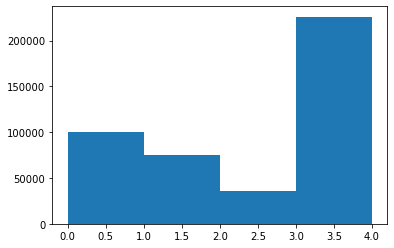

In [24]:
#Histogram
import matplotlib.pyplot as plt
plt.hist(app['NAME_INCOME_TYPE'], bins=4)
plt.show()

C:\Users\aashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='count'>

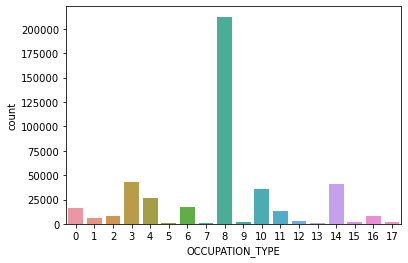

In [25]:
import seaborn as sns
sns.countplot(app['OCCUPATION_TYPE'])

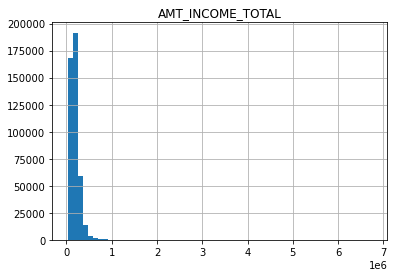

In [26]:
pd.DataFrame(app.AMT_INCOME_TOTAL).hist(bins = 60) ;

In [27]:
app["target"] = np.log(app.AMT_INCOME_TOTAL + 1)

In [28]:
target_scaler = MinMaxScaler(feature_range=(-1, 1))
app["target"] = target_scaler.fit_transform(app.target.values.reshape(-1,1))

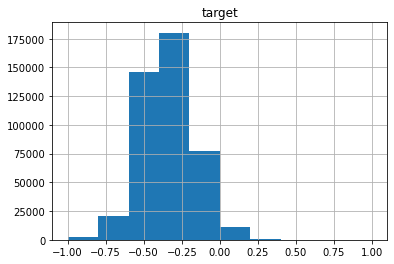

In [29]:
pd.DataFrame(app.target).hist() ;

In [30]:
#split the data
dapp, dvalid = train_test_split(app,
                                  random_state=123,
                                  train_size=0.99    
                                 )

print(dapp.shape)     
print(dvalid.shape)    

(434124, 19)
(4386, 19)


In [31]:
dapp.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
132508,5625745,0,1,1,0,157500.0,1,4,1,1,-19796,365243,1,0,1,0,8,2.0,-0.352888
132623,5625888,1,1,1,0,243000.0,0,1,2,1,-17050,-135,1,1,1,1,3,1.0,-0.196773
38462,6099010,0,0,1,0,247500.0,0,1,3,1,-11632,-2686,1,0,0,0,2,1.0,-0.190168
121946,5548803,0,1,1,1,225000.0,2,4,1,1,-12944,-6127,1,0,0,0,8,3.0,-0.224480
101516,5417053,1,1,1,0,292500.0,4,4,3,1,-10088,-942,1,0,0,0,14,1.0,-0.130026


In [32]:
def get_keras_data(dataset):
    X = {   
        'ID_in': app.ID.values,                                                            
        'AMT_INCOME_TOTAL_in': app.AMT_INCOME_TOTAL.values,                                                           
        'NAME_INCOME_TYPE_in': app.NAME_INCOME_TYPE.values,                                                
        'NAME_EDUCATION_TYPE_in': app.NAME_EDUCATION_TYPE.values,                                                
        'target_in': app.target.values,                                            
    }
    return X

In [33]:
X_train = get_keras_data(dapp)

In [34]:
X_train.keys()

dict_keys(['ID_in', 'AMT_INCOME_TOTAL_in', 'NAME_INCOME_TYPE_in', 'NAME_EDUCATION_TYPE_in', 'target_in'])

In [35]:
for key, value in X_train.items():
    print("\n\n============")
    print(key, ' : ', value[:2])



ID_in  :  [5008804 5008805]


AMT_INCOME_TOTAL_in  :  [427500. 427500.]


NAME_INCOME_TYPE_in  :  [4 4]


NAME_EDUCATION_TYPE_in  :  [1 1]


target_in  :  [0.00659578 0.00659578]


In [36]:
X_valid = get_keras_data(dvalid)
X_crecord = get_keras_data(crecord)

In [37]:
print(X_train["ID_in"][:4])
print("\n===========")
print(X_train["ID_in"].shape)

[5008804 5008805 5008806 5008808]

(438510,)


In [38]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,0.006596
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,0.006596
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,16,2.0,-0.474022
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0,-0.158842
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0,-0.158842


In [39]:
word2vec_size = 50  
cat2vec_size = 10  
cond2vec_size = 5 

In [40]:
#layers
#Input layers

ID = Input(shape=(1,), name="ID_in")          
AMT_INCOME_TOTAL = Input(shape=(1,), name="AMT_INCOME_TOTAL_in")     
NAME_INCOME_TYPE = Input(shape=(1,), name="NAME_INCOME_TYPE_in")
NAME_EDUCATION_TYPE = Input(shape=(1,), name="NAME_EDUCATION_TYPE_in")
target = Input(shape=(1,), name="target_in")

In [41]:
emb_ID = Embedding(MAX_TEXT_VOC, word2vec_size)(ID)               
emb_AMT_INCOME_TOTAL = Embedding(MAX_TEXT_VOC, word2vec_size)(AMT_INCOME_TOTAL)

In [46]:
emb_NAME_INCOME_TYPE = Embedding(MAX_CATEGORY_VOC,     cat2vec_size)(NAME_INCOME_TYPE)
emb_NAME_EDUCATION_TYPE = Embedding(MAX_CATEGORY_VOC,  cat2vec_size)(NAME_EDUCATION_TYPE)
emb_target = Embedding(MAX_CATEGORY_VOC, cond2vec_size)(target)

In [47]:
rnn_layer2 = GRU(8) (emb_ID)
rnn_layer1 = GRU(16) (emb_AMT_INCOME_TOTAL)

In [48]:
#Concatenation
print(f"emb_NAME_INCOME_TYPE: {emb_NAME_INCOME_TYPE.shape}")            
print(f"emb_NAME_EDUCATION_TYPE: {emb_NAME_EDUCATION_TYPE.shape}")      
print(f"emb_target: {emb_target.shape}")    
print(f"rnn_layer1: {rnn_layer1.shape}")                    
print(f"rnn_layer2: {rnn_layer2.shape}") 

emb_NAME_INCOME_TYPE: (None, 1, 10)
emb_NAME_EDUCATION_TYPE: (None, 1, 10)
emb_target: (None, 1, 5)
rnn_layer1: (None, 16)
rnn_layer2: (None, 8)


In [49]:
tf.keras.layers.concatenate([emb_NAME_INCOME_TYPE, emb_NAME_EDUCATION_TYPE, emb_target])

<KerasTensor: shape=(None, 1, 25) dtype=float32 (created by layer 'concatenate')>

In [52]:
rnn_layer1 = tf.keras.layers.Reshape(target_shape = (1,16))(rnn_layer1)
rnn_layer2 = tf.keras.layers.Reshape(target_shape = (1,8) )(rnn_layer2)

In [56]:
main_l = tf.keras.layers.concatenate([emb_NAME_INCOME_TYPE, emb_NAME_EDUCATION_TYPE, emb_target, rnn_layer1, rnn_layer2])

In [57]:
#Design Classification layer

dr_r = 0.1   

#Add clasification layer
main_l = Dense(128) (main_l)
main_l = Dropout(dr_r)(main_l)
main_l = Dense(64) (main_l)
main_l = Dropout(dr_r) (main_l)

In [58]:
output = Dense(1, activation="linear") (main_l)

In [60]:
#Final model
model = Model(
              inputs= [                     
                        ID,
                        AMT_INCOME_TOTAL,
                        NAME_INCOME_TYPE,                                                
                        NAME_EDUCATION_TYPE,                                                
                        target,
                        ],
              outputs= output
              )

In [62]:
model.compile(loss="mse",
              optimizer="adam",
              metrics=["mae"]   
              )

In [63]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 AMT_INCOME_TOTAL_in (InputLaye  [(None, 1)]         0           []                               
 r)                                                                                               
                                                                                                  
 ID_in (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 50)        950         ['AMT_INCOME_TOTAL_in[0][0]']    
                                                                                                  
 embedding (Embedding)          (None, 1, 50)        950         ['ID_in[0][0]']              

In [64]:
#Fit model
BATCH_SIZE = 20000
epochs = 5

In [65]:
for key, value in X_train.items():
    print("\n\n============")
    print(key, ' : ', value[:2])



ID_in  :  [5008804 5008805]


AMT_INCOME_TOTAL_in  :  [427500. 427500.]


NAME_INCOME_TYPE_in  :  [4 4]


NAME_EDUCATION_TYPE_in  :  [1 1]


target_in  :  [0.00659578 0.00659578]


In [ ]:
start = time.time()
history= model.fit(X_train,
                   dapp.target,
                   epochs=epochs,
                   batch_size=BATCH_SIZE,
                   validation_data=(X_valid, dvalid.target),
                   
                   verbose=1
                  )

end = time.time()
print((end-start)/60)